# **MACHINE LEARNING PREDICT:**
# **E-COMMERCE CUSTOMER CHURN**
**by : Nadya Sarilla Agatha**


## **Business Problem Understanding**
---

### **A. Latar Belakang**

Dalam era bisnis modern, retensi pelanggan adalah faktor krusial yang memengaruhi kelangsungan suatu perusahaan dalam persaingan yang semakin ketat. Profitabilitas suatu perusahaan dipengaruhi oleh berbagai faktor, namun retensi pelanggan memiliki peran utama. Kemampuan perusahaan dalam mempertahankan dan memperluas basis pelanggan yang setia merupakan tujuan utama, dan pengembangan metode pembelajaran yang dapat membantu mencegah dan mengurangi pelanggan yang beralih (customer churn) memiliki nilai yang sangat penting.

Hal ini menunjukkan bahwa setiap bisnis, termasuk perusahaan E-commerce, harus menjaga hubungan dengan pelanggan yang setia. Evaluasi terhadap pelanggan yang meninggalkan layanan dalam jangka waktu tertentu, atau yang dikenal sebagai *customer churn*, merupakan langkah penting. Kehilangan pelanggan yang loyal dapat merugikan karena perusahaan harus mengeluarkan biaya hingga 16 kali lipat lebih besar untuk menggantikan pelanggan tersebut dengan pelanggan baru. Dengan memiliki wawasan tentang pelanggan mana yang berisiko untuk beralih, perusahaan dapat menyusun strategi pemasaran yang lebih efektif dan memberikan perhatian khusus kepada kelompok pelanggan ini."

### **B. Pernyataan Masalah**

Perusahaan e-commerce ingin mengetahui customer churn atau pelanggan yang tidak menggunakan jasa perusahaan lagi, sehingga dapat menimbulkan kerugian bagi perusahaan. Oleh karena itu, perusahaan perlu melakukan prediksi terhadap customer, agar sebelum costumer benar-benar churn, perusahaan dapat menjangkau customer tersebut dengan memberikan layanan yang lebih baik, seperti memberikan promo yang menarik. Namun, sebaiknya promo diberikan kepada orang yang tepat. Dengan demikian, perusahaan dapat menghindari kerugian yang akan terjadi akibat kehilangan pelanggan.

Pelanggan loyal yang *churn* dapat merugikan perusahaan apabila tidak dihiraukan, untuk itu perusahaan perlu mempertahankan aktivitas pelanggan loyal di platform E-commerce. Salah satu cara yang dapat dilakukan adalah memberikan promosi. Namun, biaya dan sumber daya yang dikeluarkan menjadi kurang efektif apabila promosi dilakukan tanpa strategi. 


### **C. Tujuan**

Berdasarkan permasalahan diatas, perusahaan perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pelanggan akan berhenti menggunakan berlanggan atau tidak, sehingga dapat memfokuskan upaya-upaya retensi pada pelanggan yang terindikasi untuk churn.

### **D. Pendekatan Analitik**

Pendekatan analitik yang dilakukan berupa pembuatan, evaluasi, dan implementasi model machine learning klasifikasi yang dapat memprediksi apabila pelanggan akan *churn* atau tidak berdasarkan riwayat data sebelumnya. 

### **E. Metrik Evaluasi**

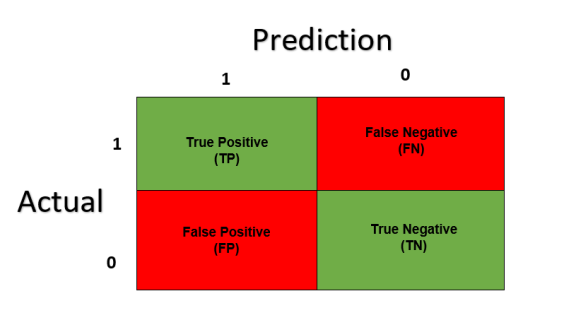

Target:   
0 (Negatif) : Pelanggan tidak *churn*  
1 (Positif) : Pelanggan *churn*

- **True Positive (TP)**: Pelanggan diprediksi dan kenyataannya melakukan churn
- **False Positive (FP)**: Pelanggan diprediksi melakukan churn, namun pada kenyataannya customer tidak melakukan churn
- **False Negative (FN)**: Pelanggan diprediksi tidak melakukan churn, namun pada kenyataannya customer melakukan churn
- **True Negative (TN)**: Pelanggan diprediksi dan kenyataannya tidak melakukan churn

Dalam melakukan prediksi, kesalahan dapat terjadi, yaitu:
- **Type 1 Error** : False Positive
    - Konsekuensi : Perusahaan mengeluarkan biaya pada pelanggan yang kurang tepat.
- **Type 2 Error** : False Negative
    - Konsekuensi : Hilangnya pelanggan loyal

Model yang telah dibuat harus mampu mengurangi kerugian perusahaan akibat kehilangan pelanggan atau mengurangi kesalahan prediksi False Negatif. Namun, perlu juga dijaga agar perusahaan tidak menghabiskan biaya yang tidak diperlukan untuk memberikan promosi kepada pelanggan yang sebenarnya tidak berisiko (False Positive). Oleh karena itu, kita menggunakan metrik utama yaitu **F2 score**.

F2 score adalah metrik evaluasi klasifikasi yang memperhitungkan presisi dan recall. Nilai F2 score didasarkan pada parameter beta, di mana jika beta lebih besar dari 1, maka lebih menekankan recall daripada presisi. Metrik ini berguna untuk menilai kinerja model klasifikasi, terutama dalam kasus di mana kesalahan False Negatif lebih kritis daripada False Positive.    
    

## **Data Understanding**
---

### **Aspek-Aspek Dalam Data**

Dataset milik perusahaan E-Commerce online terkemuka. Sebuah perusahaan ritel online (E-commerce) ingin mengetahui pelanggan yang akan melakukan churn, sehingga mereka dapat mendekati pelanggan untuk menawarkan beberapa promo. Dataset berisikan profil dan riwayat transaksi pelanggan.

| Attribute | Data Type | Description |
| --- | --- | --- |
| Tenure | Float | Masa tenure pelanggan |
| Warehouse to Home | Float | Jarak antara warehouse ke rumah pelanggan | 
| Number of Device | Int | Jumlah perangkat yang terdaftar |
| Prefered Order Cat | Object | Kategori disukai pelanggan bulan lalu| 
| Satisfaction Score | Int | Skor kepuasan pelanggan |
| Marital | Object | Status pernikahan pelanggan |
| Number of Address | Int | Jumlah alamat yang terdaftar |
| Complain | Int | 0 - Tidak Ada complain, 1 - ada complain |
| Day Since Last Order | Float | Hari sejak pemesanan terakhir |
| Cashback Amount | Float | Rata-rata cashback bulan lalu |
| Churn | Int | 0 - Tidak *churn* , 1 - *Churn* | 


### **Import Data**

In [1]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno

# Statistics
from scipy.stats import normaltest

# Train test split
from sklearn.model_selection import train_test_split

# Preprocessing & Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import category_encoders as ce
from sklearn.compose import ColumnTransformer

# Resampler untuk Data Imbalance
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Modeling : algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score

# Metrics untuk klasifikasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import fbeta_score, make_scorer

#from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind,shapiro

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Ignore warning
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('data_ecommerce_customer_churn.csv')
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


### **Informasi Data**

In [3]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [4]:
# Menampilkan jumlah baris dan kolom
data.shape

(3941, 11)

In [5]:
# Menunjukkan statistik deskriptif masing-masing kolom
display(data.describe(), data.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


Dari data diatas dapat diketahui beberapa hal:  
- Terdapat 3941 baris dan 11 kolom pada dataset
- Data numerik dengan variabel quantitatif antara lain Tenure, Warehouse to Home, Number of Device, Number of Address, Day Since Last Order, dan Cashback Amount. 
- Data numerik yang menunjukkan yes or no atau bersifat qualitatif adalah complain, dan churn. 
- Data numerik yang menunjukkan qualitatif dengan scale ordinal adalah satisfaction score. 
- Data kategorik ada dua antara lain Prefered Order Cat dan Marital. 
- Dari info dataset terlihat ada beberapa missing value, yang akan ditindak-lanjuti di data cleaning.


## **Data Cleaning**
---

**Tujuan** : Mencari anomali data dan menanggulangi anomali tersebut.

Langkah-langkah yanng dilakukan dalam *data cleaning* adalah:
1. Melihat informasi dataset termasuk tipe data, unique value, dan jumlah unique value dari setiap kolom.
2. Mengubah tipe data dari tiap kolom yang sekiranya belum sesuai.
3. Mengecek adanya *missing value* serta menanggulangi *missing value* yang terdapat dalam kolom data.
4. Melihat adanya *duplicate values* dan melakukan analisis.
5. Menganalisis outliers yang terdapat dalam dataset.

#### **Informasi Dataset**

Pertama kita akan melihat informasi detail menegnai dataset yang berisi data unik dari masing-masing fitur, melihat apakah data yang terduplikat, serta melihat apakah ada value pada dataset yang *typo*.

In [6]:
#Menampilkan detail informasi dari setiap kolom, yaitu:
# 1. Nama kolom
# 2. Tipe data
# 3. Jumlah Missing Value
# 4. Persentase jumlah Missing Value
# 5. Jumlah unique value
# 6. Sampel unique value 

list_data = []
for i in data.columns :
    list_data.append([
        i, #nama kolom
        data[i].dtype, #tipe data dari setiap kolom
        data[i].isna().sum(), #jumlah missing value
        round((data[i].isna().sum()/len(data)*100),2), #persentase missing value
        data[i].nunique(), #jumlah unique value
        list(data[i].drop_duplicates()) #sampel unique value
    ])

pd.DataFrame(list_data, columns = ['Kolom', 'Tipe Data', 'null', 'nullPct', 'Unique', 'Sampel Unique'])

,Kolom,Tipe Data,null,nullPct,Unique,Sampel Unique
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Dari data diatas dapat dilihat bahwa tidak ada typo. Lalu pada kolom *PreferedOrderCat* terdapat 2 kategori yang sama yaitu "Mobile" dan "Mobile Phone", sehingga semua baris dengan kategori "Mobile Phone".

In [7]:
# Menghitung jumlah per Kategori
data['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

In [8]:
# Mengubah Mobile menjadi Mobile Phone
data['PreferedOrderCat'] = data['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
data['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

Setelah menyatukan kategori "Mobile" dan "Mobile Phone", kemudian dicek apakah ada data yang terduplikasi. Namun karena tidak ada informasi mengenai *Customer ID*, maka pengecekan dilakukan dengan melihat setiap baris yang memiliki data yang sama.

#### **Duplicate Data**

In [9]:
# Melihat Jumlah Data Duplikat
Duplikat = data.duplicated().sum()
PersentaseDup = round((data.duplicated().sum()/data.shape[0])*100,2)
print (f'Data duplikat : {Duplikat}, Persentase Data Duplikat: {PersentaseDup}')

Data duplikat : 672, Persentase Data Duplikat: 17.05


Terdapat 672 data duplikat dari 3941 baris dengan persentase 17,05%. Karena pada dataset **tidak adanya Customer ID** data dianggap benar-benar duplikat. Langkah yang dilakukan untuk menangani data duplikat adalah menghapus baris duplikat. Data duplikat harus dihapus karena dapat mempengaruhi performa model machine learning yang dibuat yang nantinya hasil evaluasi data test bisa menjadi bias karena adanya information leakage dari data yang ditraining.

In [10]:
# Menghapus data duplikat
data.drop_duplicates(inplace=True)
print(f'shape data: {data.shape}, jumlah data duplikat: {data.duplicated().sum()}')

shape data: (3269, 11), jumlah data duplikat: 0


#### **Missing Value**

Setelah menghapus data duplikat, selanjutnya kita akan menanggulangi missing value yang terdapat dalam dataset.

In [11]:
# Melihat Missing Value masing-masing kolom
data.isna().sum()

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [12]:
# Menampilkan total missing value dan persentasenya
print(f'''Total missing value: {data.isnull().sum().sum()}
Jumlah baris dengan missing value: {data[data.isnull().any(axis=1)].shape[0]}
Persentase Baris dengan missing value: {round(data.isnull().sum().sum()/data.shape[0]*100,2)}%''')


Total missing value: 475
Jumlah baris dengan missing value: 475
Persentase Baris dengan missing value: 14.53%


Dari informasi diatas, kolom yang memiliki missing value ialah *Tenure*, *WarehouseToHome*, dan *DaySinceLastOrder*. Karena jumlah missing value cukup besar yaitu 14,53%, baris yang berisi missing value tidak akan didrop karena dapat mengurangi jumlah data dan informasi yang diketahui. Semua missing value diatas merupakan data numerik dalam tipe float dengan jenis *continuous*.

Missing value akan divisualisasi dengan *library missingno* untuk mempermudah pemilihan metode yang tepat dalam mengatasi *missing value*.

<Axes: >

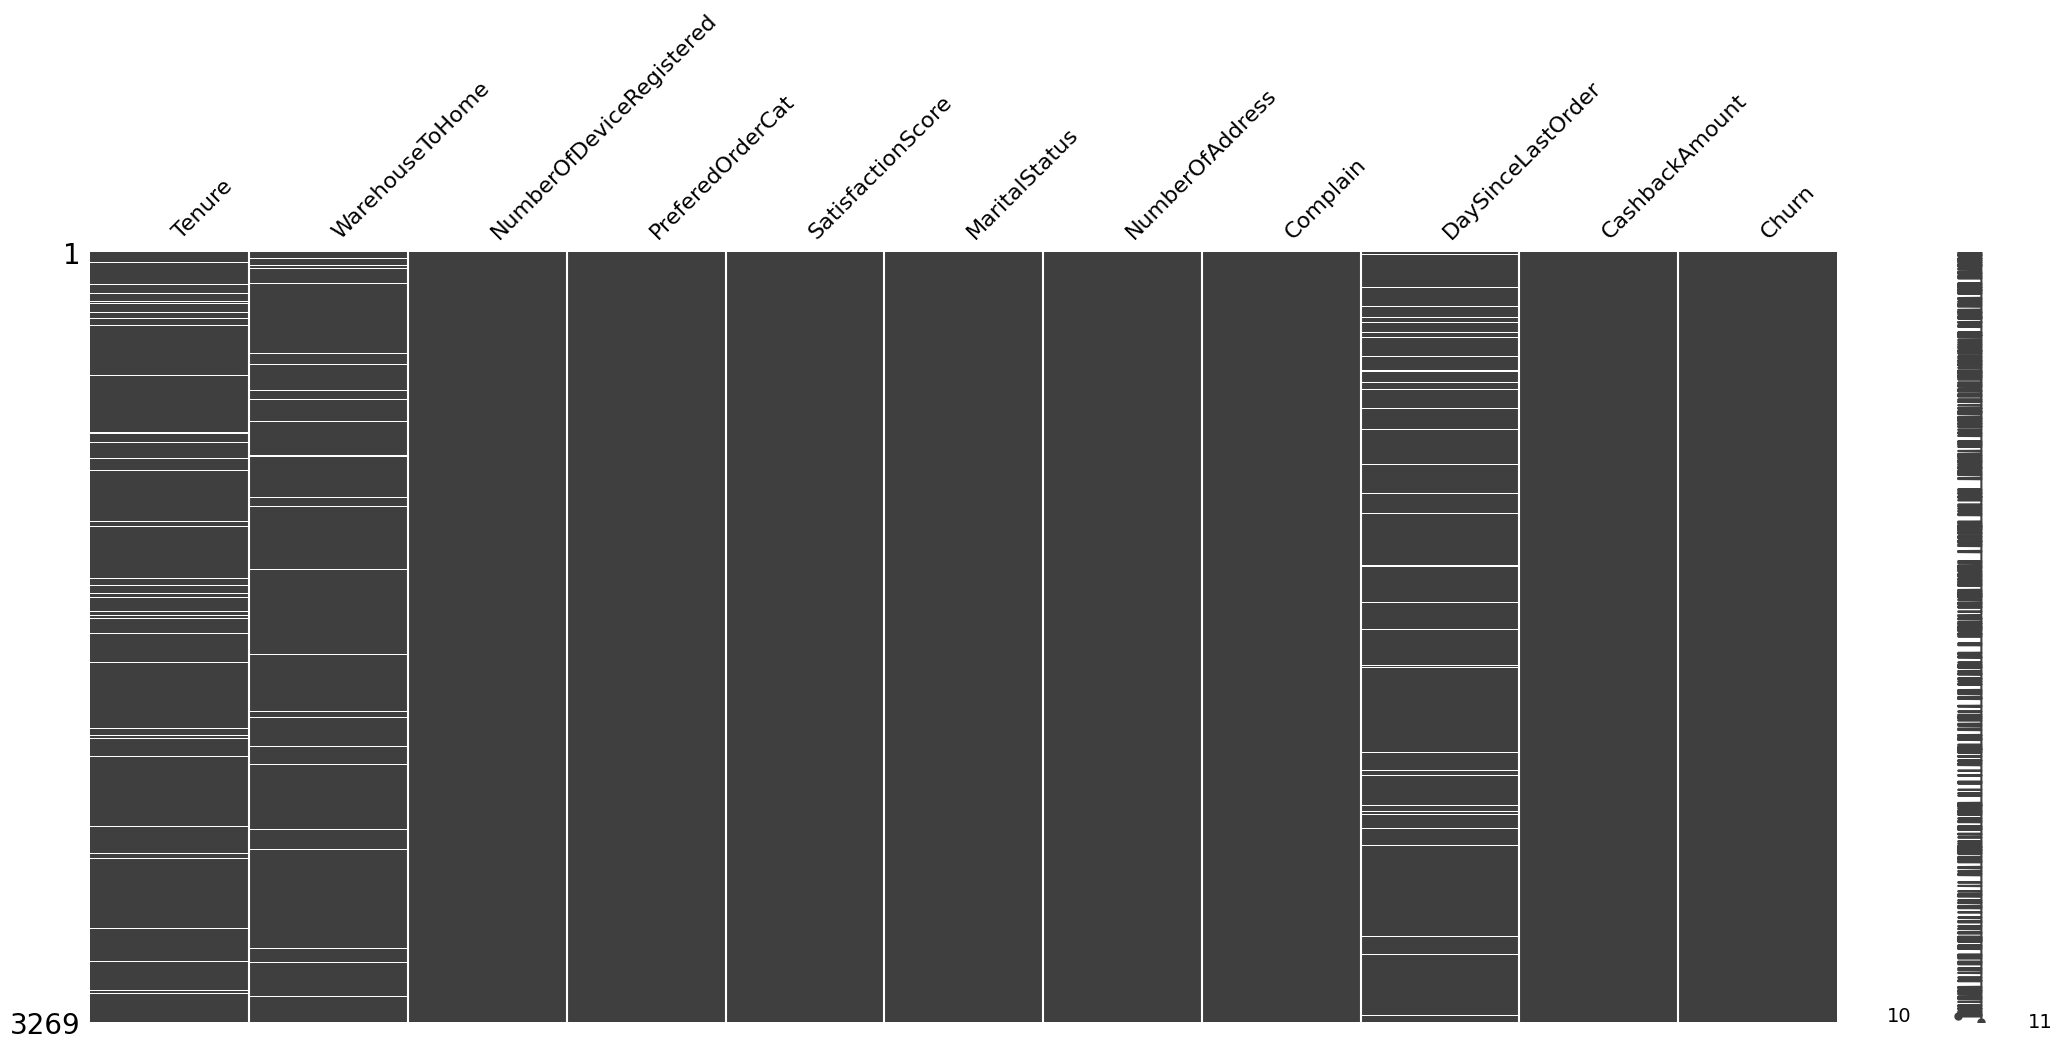

In [13]:
# Melihat missing value dengan matrix plot
msno.matrix(data)

Terlihat bahwa pola *missing value* cukup acak. Oleh karena itu untuk mengisi missing value perlu dilihat korelasi antar kolomnya.

<Axes: >

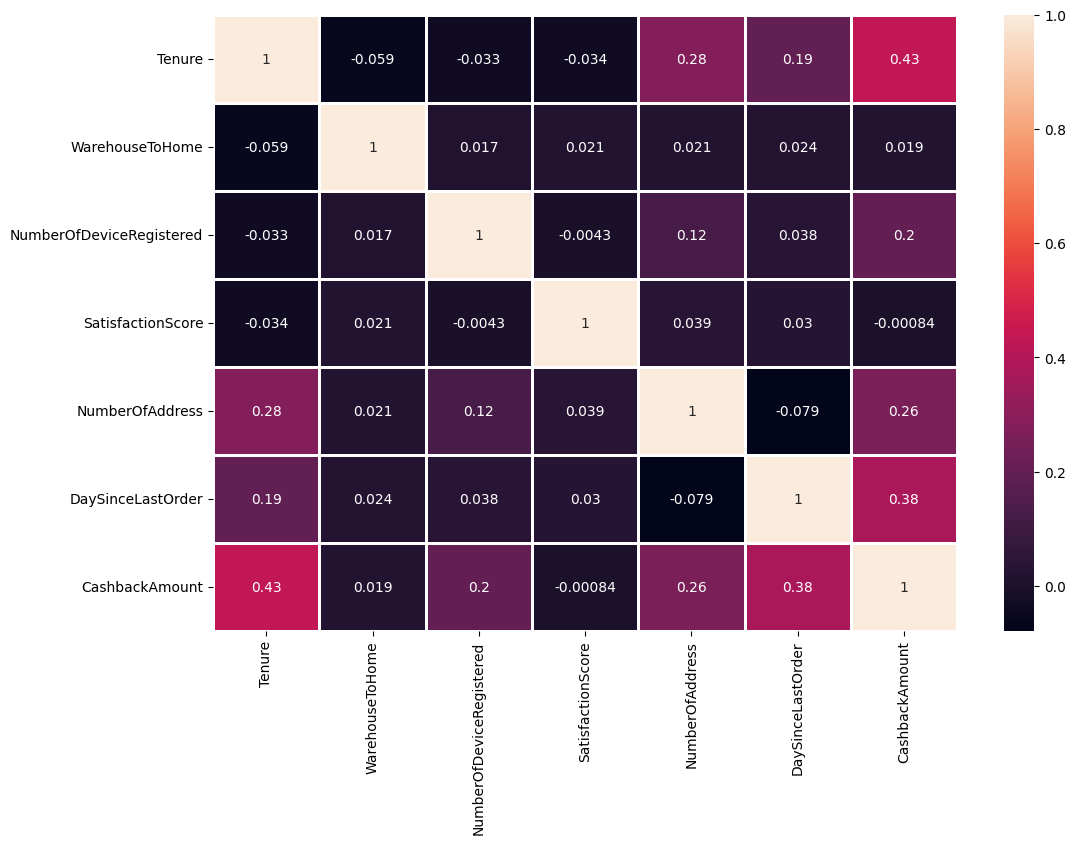

In [14]:
# Melihat korelasi kolom variabel numerik
plt.figure(figsize=(12,8))
sns.heatmap(data[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']].corr('spearman'), annot= True, linewidths= 1)

Dari heatmap diatas dapat kita lihat kolom 'Tenure', 'WarehouseToHome', dan 'DaySinceLastOrder' yang memiliki missing value memiliki korelasi tertinggi dengan 'CashbackAmount', sehingga pengisian missing value dengan metode IterativeImputer dengan kolom 'CashbackAmount'.

In [15]:
# Mengisi missing value dengan IterativeImputer
kolom_imp = data[['Tenure','WarehouseToHome','DaySinceLastOrder','CashbackAmount']]

imputer = IterativeImputer(max_iter=10)
imp_bed = imputer.fit_transform(kolom_imp)

# Memasukan imputasi kedalam kolom yang berisi missing value
data['Tenure'] = imp_bed[:,0].round().astype(float)
data['WarehouseToHome'] = imp_bed[:,0].round().astype(float)
data['DaySinceLastOrder'] = imp_bed[:,0].round().astype(float)


In [16]:
# Mengecek missing value setelah imputasi
data.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

Hasil : data sudah tidak memiliki missing value.

#### **Outliers**

Beberapa model nanti yang akan digunakan ketika *modeling* memiliki sifat yang sensitif terhadap outlier seperti Logistic Regression, K-Nearest Neighbour, dsb. Oleh karena itu perlu dilakukan analisis terhadap outlier.

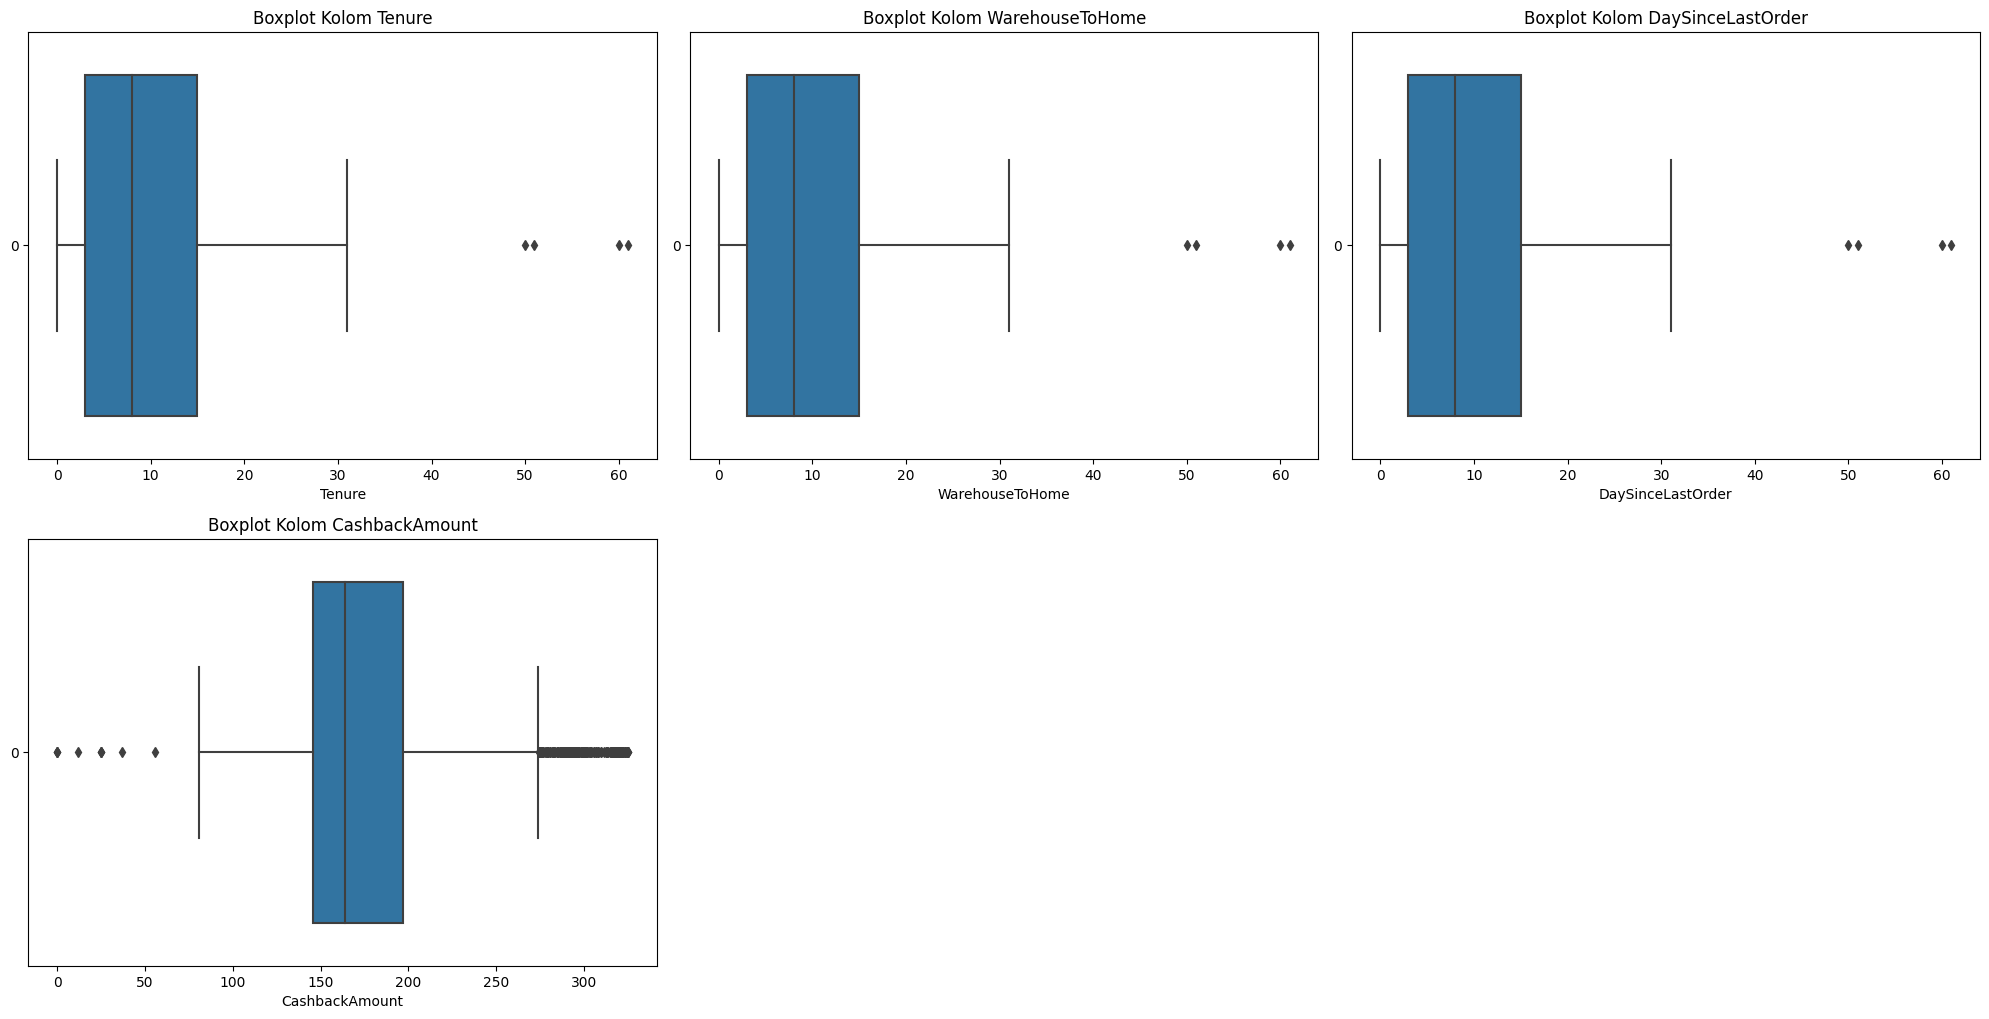

In [17]:
# Membuat variabel baru berisi kolom-kolom numerik kontinu
outliers_numerik = data[[
    'Tenure',
    'WarehouseToHome',
    'DaySinceLastOrder',
    'CashbackAmount',    
]]

# Menampilkan Outliers dengan Boxplot
plt.figure(figsize=(20,20))
for x, kolom in enumerate(outliers_numerik, 1):
    plt.subplot(4, 3, x)  # Menggunakan x sebagai indeks subplot
    sns.boxplot(data=data[kolom], orient='horizontal') #visualisasi outliers dengan boxplot
    plt.title(f'Boxplot Kolom {kolom}') #judul boxplot
    plt.xlabel(kolom)

plt.tight_layout()
plt.show()


In [18]:
# Menampilkan lower bound (quartil bawah), upper bound (quartil atas), outlier, dan persentase outlier
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    condition = (data[column] < lower_bound) | (data[column] > upper_bound)
    outliers = data[condition]
    return lower_bound, upper_bound, outliers

for column in outliers_numerik:
    lower_bound, upper_bound, data_outliers = outliers(data, column)
    data_outliers_count = len(data_outliers)
    persentase_outliers = round(data_outliers_count / len(data[column]) * 100, 2)

    print(f'Hasil pada kolom "{column}" yaitu, Lower bound = {round(lower_bound, 2)}, Upper bound = {round(upper_bound, 2)}, Total outliers = {data_outliers_count}, dan Persentase outliersnya = {persentase_outliers}')


Hasil pada kolom "Tenure" yaitu, Lower bound = -15.0, Upper bound = 33.0, Total outliers = 4, dan Persentase outliersnya = 0.12
Hasil pada kolom "WarehouseToHome" yaitu, Lower bound = -15.0, Upper bound = 33.0, Total outliers = 4, dan Persentase outliersnya = 0.12
Hasil pada kolom "DaySinceLastOrder" yaitu, Lower bound = -15.0, Upper bound = 33.0, Total outliers = 4, dan Persentase outliersnya = 0.12
Hasil pada kolom "CashbackAmount" yaitu, Lower bound = 69.04, Upper bound = 274.0, Total outliers = 253, dan Persentase outliersnya = 7.74


Berdasarkan perhitungan di atas, data outlier pada kolom Tenure dan WarehouseToHome akan dihapus karena persentasenya tergolong kecil. Namun, pada kolom DaySinceLastOrder dan CashbackAmount, diabaikan karena dianggap sebagai nilai yang wajar apabila memiliki nilai variansi yang tinggi.

In [19]:
# Menghapus data outlier pada kolom Tenure dan WarehouseToHome

data.drop(data[data['Tenure']>37].index,inplace=True)
data.drop(data[data['WarehouseToHome']>36.5].index,inplace=True)

## **Exploratory Data Analysis**
---

Sebelum dilakukan analisis perlu dilihat distribusi data dari setiap kolom numerik untuk melihat apakah data terdistribusi normal atau tidak normal. Apabila diketahui distribusi tidak normal atau skewed, maka digunakan median sebagai nilai tengah, dan apabila terdistribusi normal maka mean digunakan sebagai nilai tengah.

#### **Analisis Distribusi Data**

In [20]:
# Menampilkan distribusi data dengan test normalitas 

# import fungsi dari library untuk uji normalitas
from scipy.stats import kstest

# Nama kolom yang akan diuji normalitas
kolomNormalitas = data[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']]

# Membuat list kosong untuk menaruh hasil uji distribusi dari setiap kolom
list = []

# Melakukan uji normalitas pada setiap kolom dalam kolomNormalitas
for col in kolomNormalitas:
    ks, p_value = kstest(data[col], 'norm')
    distribusi = 'distribusi normal' if p_value > 0.05 else 'distribusi tidak normal'
    list.append([col, distribusi])

print('Hasil Uji Normalitas')

for result in list:
    print(f'Kolom "{result[0]}" memiliki {result[1]}')


Hasil Uji Normalitas
Kolom "Tenure" memiliki distribusi tidak normal
Kolom "WarehouseToHome" memiliki distribusi tidak normal
Kolom "DaySinceLastOrder" memiliki distribusi tidak normal
Kolom "CashbackAmount" memiliki distribusi tidak normal


Berdasarkan uji normalitas pada kolom 'Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount' diperoleh **distribusi data tidak normal**. Maka untuk mencari nilai tengah dalam analisis data menggunakan **median**.

Analisis yang dilakukan bertujuan untuk memahami karakteristik dari pelanggan yang *churn* dengan melihat proporsi pelanggan yang *churn* dan yang tidak *churn*.

#### **1. Proporsi Pelanggan Churn dan Tidak Churn** 

In [21]:
# Perbandingan pelanggan yang tidak churn dan churn
print('Jumlah pelanggan yang tidak churn dan churn')
print(data['Churn'].value_counts())

# Persentase pelanggan yang churn dan tidak churn
print('Persentase pelanggan yang tidak churn dan churn')
print(data['Churn'].value_counts()/len(data['Churn'])*100)

Jumlah pelanggan yang tidak churn dan churn
0    2732
1     533
Name: Churn, dtype: int64
Persentase pelanggan yang tidak churn dan churn
0    83.675345
1    16.324655
Name: Churn, dtype: float64


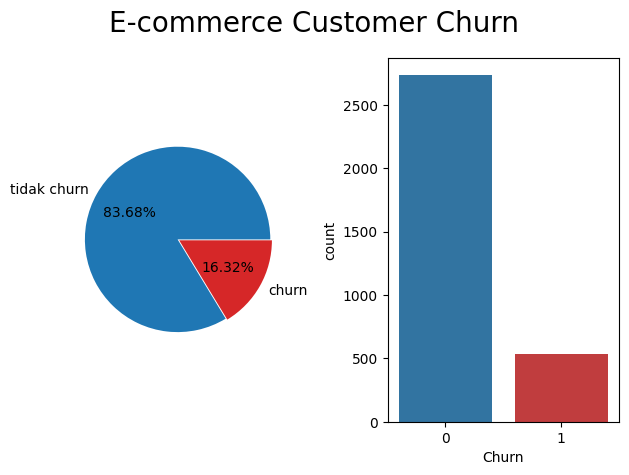

In [22]:
# #Membuat kanvas grafik dan menambahkan judul
plt.figure().suptitle('E-commerce Customer Churn', fontsize=20)

# Visualisasi Perbandingan pelanggan tidak churn dan churn
sns.color_palette('pastel')
plt.subplot(1,2,1)
plt.pie(data['Churn'].value_counts(), labels=['tidak churn','churn'], colors= ['tab:blue','tab:red'],autopct='%.2f%%',explode=(0.01,0.01))
plt.subplot(1,2,2)
sns.countplot(data=data, x='Churn',palette=['tab:blue',"tab:red"])
sns.color_palette('pastel')

#Menampilkan grafik
plt.tight_layout()
plt.show()  

Dari hasil diatas dapat dilihat bahwa terdapat **imbalance data**. Hal ini dikarenakan proporsi kelas yang timpang dengan proporsi tidak churn 83,67% dan proporsi churn 16.33%. Data yang imbalance dapat berdampak buruk pada model machine learning yang akan dibuat terutama pada saat memprediksi kelas dengan jumlah yang lebih sedikit atau kelas minoritas. Oleh karena itu, perlu dilakukan metode resampling Random Under Sampling, dan Near Miss yaitu meningkatkan kelas minoritas mengikuti kelas mayoritas pada saat modeling.

Selanjutnya, dilakukan analisis pengaruh masing-masing variabel terhadap pelanggan yang *churn*.

#### **2. Pengaruh Variabel Numerik (*Continuous*) Terhadap Churn**

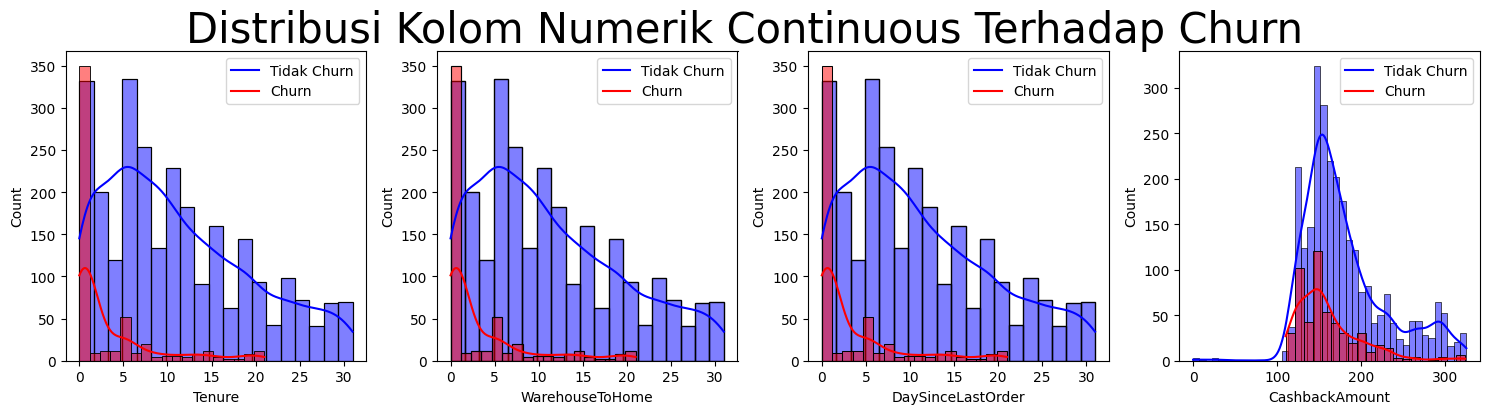

In [23]:
# List kolom yang numerik continuous
continuous = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

# Visualisasi grafik
sns.color_palette('pastel')
plt.figure(figsize=(15, 15))
plt.suptitle('Distribusi Kolom Numerik Continuous Terhadap Churn', fontsize=30)

# Looping distribusi kolom numerik
for a, kolom in enumerate(continuous, 1):
    plt.subplot(4, 4, a) # Menggunakan a sebagai indeks subplot
    sns.histplot(data=data[data['Churn'] == 0][kolom], kde=True, color='blue')
    sns.histplot(data=data[data['Churn'] == 1][kolom], kde=True, color='red')
    plt.legend(labels=['Tidak Churn', 'Churn'])
    plt.tight_layout()
    a += 1

# Menampilkan grafik
plt.show()


Dari grafik distribusi numerik *continuous* di atas terhadap variabel "Churn", didapati jumlah pelanggan yang tidak beralih ("Tidak Churn") lebih besar dibandingkan dengan yang beralih ("Churn"). Dari *statement* tersebut diperoleh beberapa *insight*, yaitu:
1. Tenure (masa penggunaan platform e-commerce dalam bulan) mempengaruhi kecenderungan pelanggan untuk *churn*. Semakin pendek masa penggunaan *platform*, semakin besar kemungkinan pelanggan akan *churn*. Terdapat fluktuasi pada pelanggan yang tidak *churn* di bulan 8-11. Hal ini menunjukkan tingkat kesetiaan pelanggan meningkat di periode tersebut.
2. WarehouseToHome (jarak antara gudang dengan rumah pelanggan) memiliki distribusi yang hampir merata pada pelanggan yang *churn*. Namun, perbedaan yang signifikan antara pelanggan yang *churn* dan tidak *churn* terjadi pada jarak di atas 20KM. Ini menunjukkan bahwa semakin jauh jarak gudang dari rumah pelanggan, semakin tinggi kemungkinan pelanggan akan *churn*.
3. DaySinceLastOrder (jumlah hari sejak pesanan terakhir) menunjukkan distribusi yang hampir sama pada pelanggan yang *churn* dan tidak *churn*. Diperlukan analisis lebih lanjut untuk memahami korelasi antara variabel ini dan kecenderungan *churn* pelanggan.
4. CashbackAmount (jumlah cashback yang diterima pelanggan) menunjukkan bahwa pelanggan yang *churn* memiliki tingkat cashback tertinggi sekitar 150. Ini akan menjadi titik fokus analisis lebih lanjut untuk memahami faktor-faktor yang berkontribusi pada hal ini.

Selain itu, kita akan memeriksa distribusi rata-rata pelanggan yang *churn* berdasarkan masing-masing variabel.

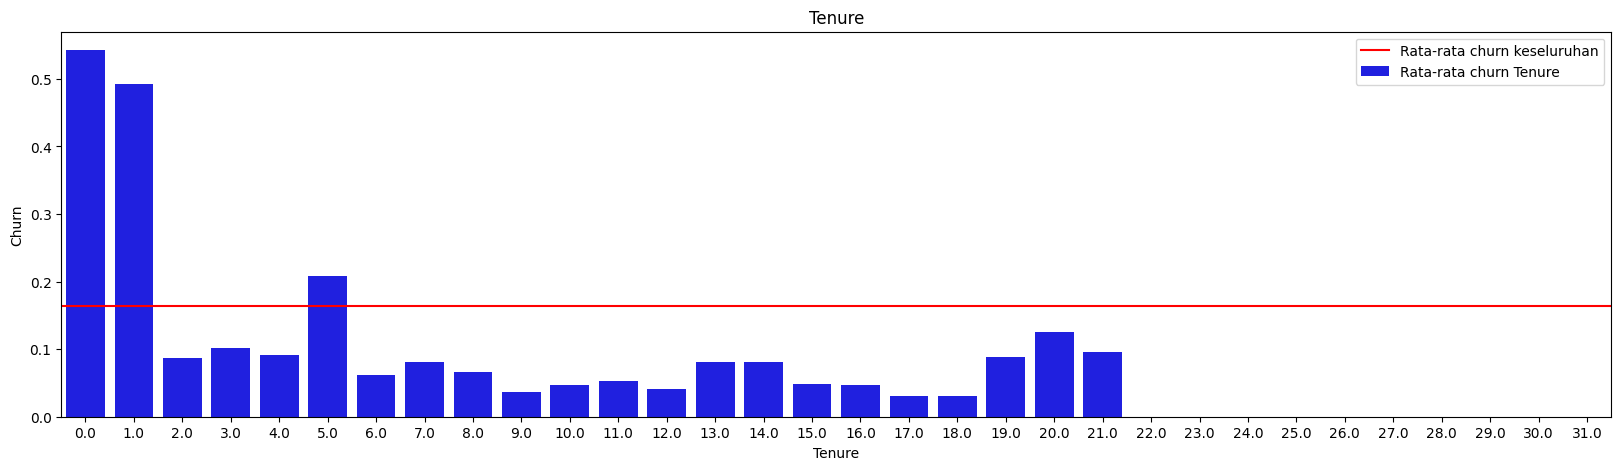

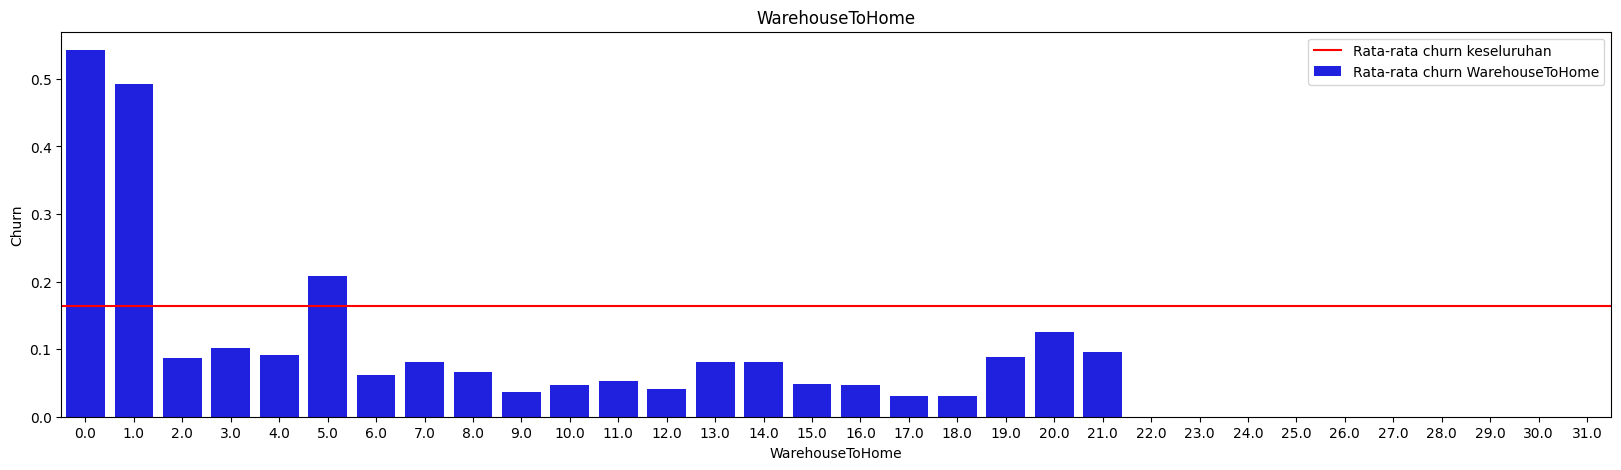

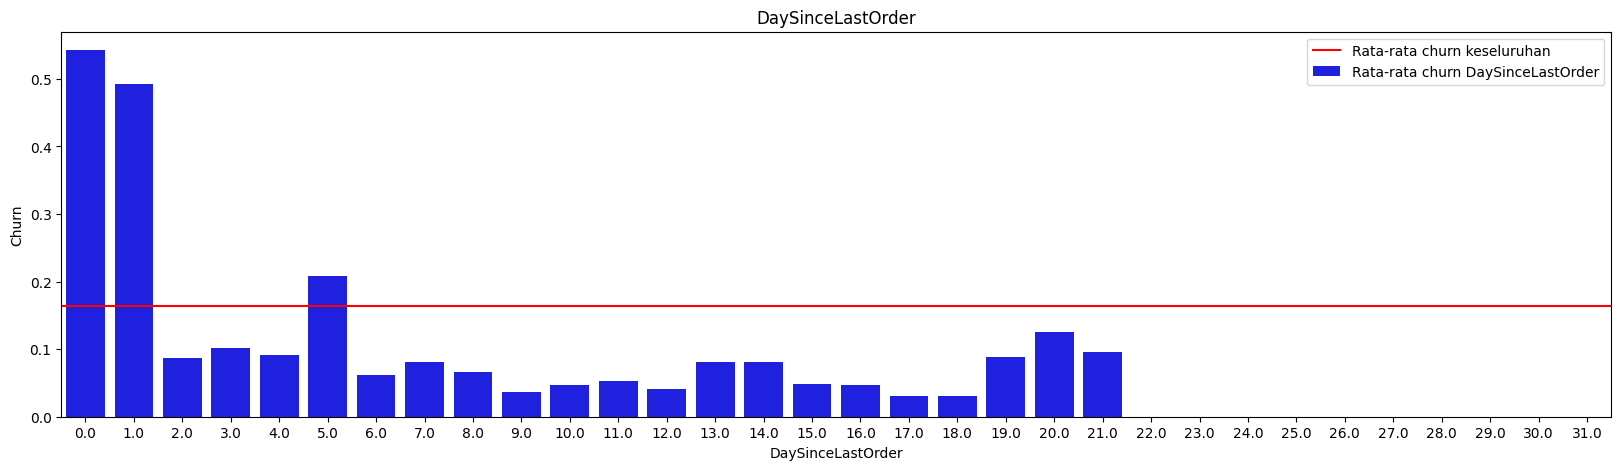

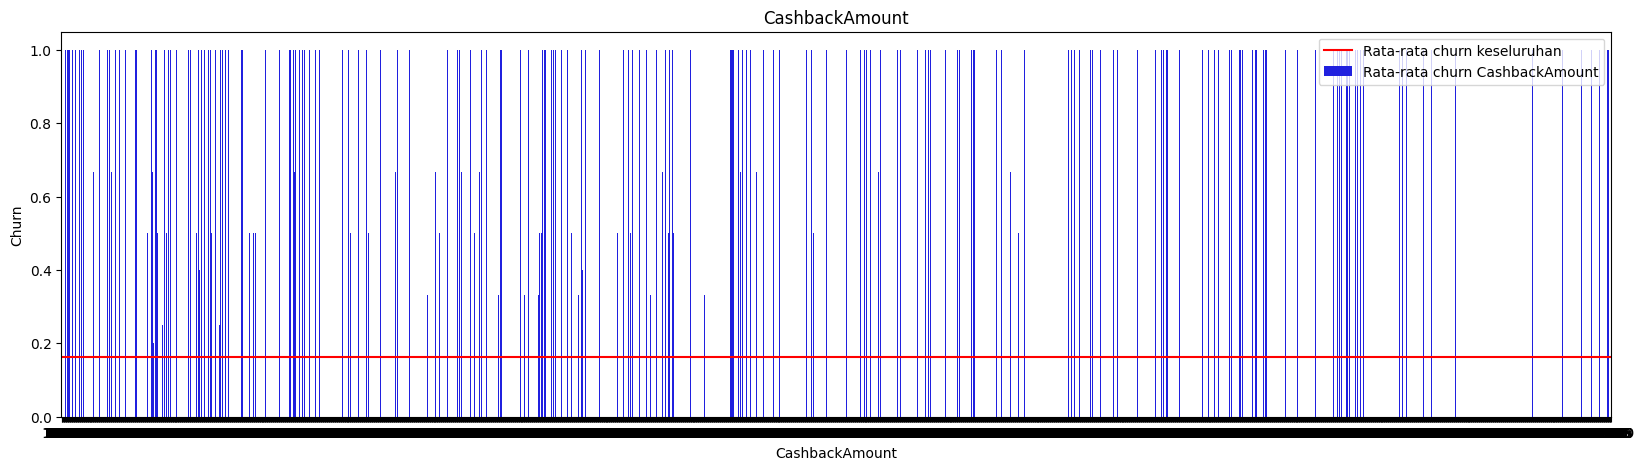

In [24]:
# Membuat kolom rata-rata churn terhadap masing-masing variabel
Churn_avg = data[data['Churn'] == 1]['Churn'].sum() / data.shape[0]

for i in continuous:
    plt.figure(figsize=(20, 5))
    sns.barplot(x=i, y='Churn', data=data, ci=None, color='b', label=f'Rata-rata churn {i}')
    plt.axhline(y=Churn_avg, label='Rata-rata churn keseluruhan', color='r')
    plt.title(i)
    plt.legend()
    plt.show()


Dari data yang telah dianalisis, diperoleh beberapa kesimpulan sebagai berikut:
1. Tingkat churn pelanggan paling tinggi terjadi pada pelanggan yang baru menggunakan platform e-commerce selama 0 hingga 2 bulan. Ini mungkin disebabkan oleh beberapa faktor, seperti:
    - Pelanggan masih beradaptasi dengan platform pada bulan-bulan awal dan mungkin merasa kurang cocok.
    - Pelanggan mungkin menemukan platform e-commerce lain yang menawarkan penawaran yang lebih menarik.
    - Pelanggan mungkin tidak menemukan variasi produk yang memadai untuk memenuhi kebutuhan mereka.
2. Tingkat churn juga lebih tinggi untuk pelanggan yang memiliki jarak antara gudang dan rumah mereka lebih dari 17 kilometer (diasumsikan dalam kilometer). Hal ini mungkin disebabkan oleh peningkatan biaya pengiriman yang diperlukan untuk jarak yang lebih jauh.
3. Rata-rata jumlah hari sejak pembelian (DaySinceLastOrder) menunjukkan angka yang tinggi, terutama dengan nilai di atas 31 hari. Namun, perlu dicatat bahwa ada beberapa data yang berada di atas 31 hari yang mungkin termasuk dalam kategori outlier. Rata-rata churn paling tinggi terjadi pada hari 0-2 setelah pembelian. Ini mungkin disebabkan oleh ketersediaan produk yang sesuai dengan kebutuhan pelanggan pada saat itu, bukan karena ketertarikan langsung pada platform e-commerce itu sendiri.
4. Rata-rata nilai CashbackAmount sulit untuk dianalisis secara langsung karena memiliki variasi yang tinggi. Oleh karena itu, akan dilakukan pengelompokkan (binning) pada tahap preprocessing.

#### **3. Pengaruh Kategori yang Diminati Terhadap Churn**

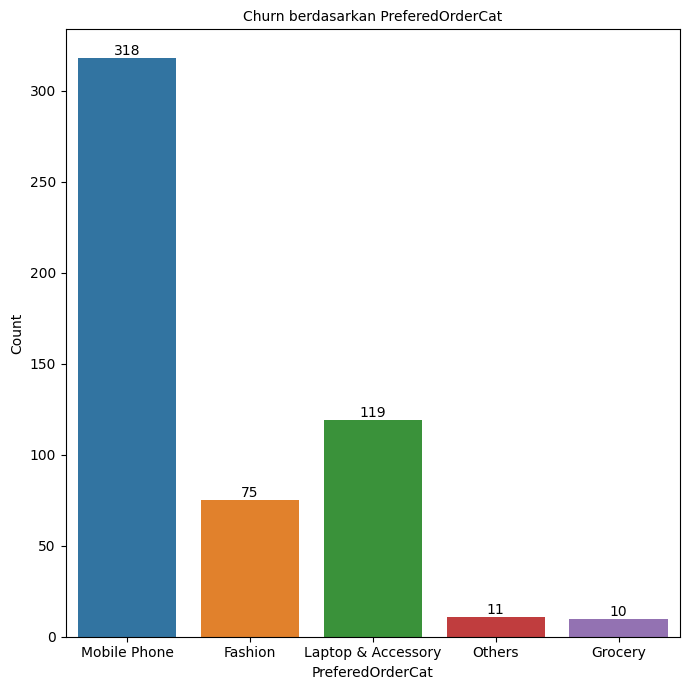

In [25]:
# Membuat kanvas grafik
plt.figure(figsize=(7, 7))

# Visualisasi grafik
ax = sns.countplot(x=data[data['Churn'] == 1]['PreferedOrderCat'])

#Menampilkan label di setiap bar
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

# Menambahkan judul grafik
plt.title('Churn berdasarkan PreferedOrderCat', fontsize=10)

# Menambahkan y label
plt.ylabel('Count')

#menampilkan grafik
plt.tight_layout()
plt.show()


Dari analisis diatas, pelanggan yang churn cenderung pelanggan yag memiliki ketertarikan terhadap "Mobile Phone".

#### **4. Pengaruh Marital Status Terhadap Churn**

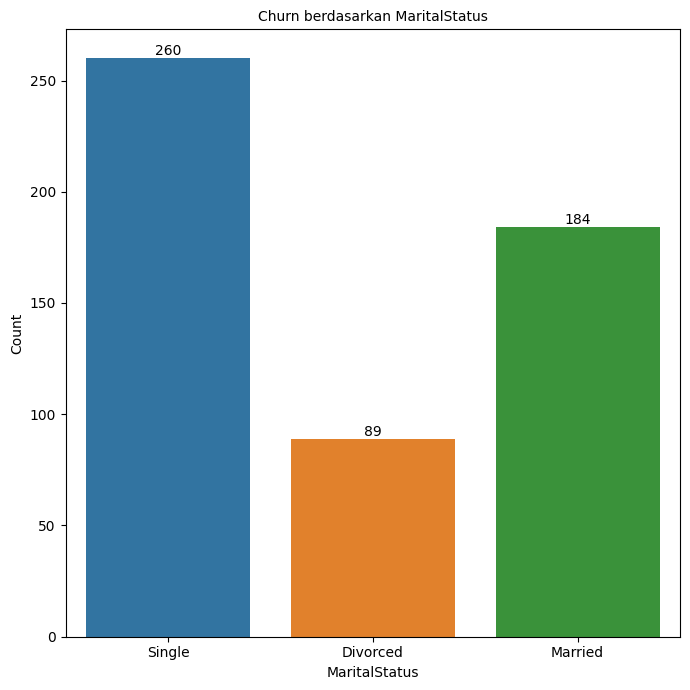

In [26]:
# Membuat kanvas grafik
plt.figure(figsize=(7, 7))

# Visualisasi grafik
ax = sns.countplot(x=data[data['Churn'] == 1]['MaritalStatus'])

#Menampilkan label di setiap bar
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

# Menambahkan judul grafik
plt.title('Churn berdasarkan MaritalStatus', fontsize=10)

# Menambahkan y label
plt.ylabel('Count')

#menampilkan grafik
plt.tight_layout()
plt.show()


Pelanggan dengan status *single* memiliki kecenderungan yang jauh lebih tinggi untuk *churn* dibanding yang sudah menikah ataupun yang becerai. 

## **Data Splitting**
---

*Data splitting* adalah salah satu teknik yang sangat penting dalam konteks machine learning. Tujuannya adalah untuk meningkatkan performa model dan mencegah terjadinya overfitting. Hal ini dicapai dengan memisahkan dataset menjadi beberapa bagian yang memiliki tujuan khusus, seperti pelatihan model, validasi model, dan pengujian model. 

Dataset pelatihan digunakan untuk melatih model, dataset validasi digunakan untuk menentukan parameter terbaik bagi model, dan dataset pengujian digunakan untuk menguji seberapa baik model bekerja pada data yang belum pernah dilihat sebelumnya. Dengan pendekatan ini, kita dapat mencegah overfitting, yaitu saat model terlalu kompleks dan tidak mampu menghasilkan prediksi yang baik pada data baru.

*Data splitting* dilakukan dengan data train 80% dan data test 20% dengan random state 2023, dan stratify y yang bertujuan untuk menyamakan proporsi semua target (*churn*) pada data train dan data test sama.

x = features <br>
y = target

In [27]:
# Membuat x (features) dan y (target)

x = data.drop(columns=['Churn']) #feature
y = data['Churn'] # target

In [28]:
# Data Splitting

xtrain,xtest,ytrain,ytest = train_test_split(
    x,
    y,
    stratify=y,
    random_state=2023,
    test_size=0.2
)


## **Data Preprocessing & Feature Engineering**
---

Setelah memahami data serta melakukan data analisis, langkah-langkah yang dilakukan dalam proses preprocessing yaitu:
1. **Scaling**
    - Melakukan Robust Scaling terhadap variabel numerik agar antar variabel memiliki skala yang sama. Variable numerik ialah 'Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount'
2. **Encoding** : 
    - Melakukan OneHotEncoding pada kolom 'MaritalStatus' karena hanya memiliki 3 kategori dan tidak ada tingkatan dalam kategori.
    - Melakukan BinaryEncoding pada kolom 'PreferedOrderCat' karena memiliki kategori yang cukup banyak yaitu 5 dan tidak ada tingkatan dalam kategori.

Membuat transformer encoding sesuai dengan penjabaran diatas.

In [29]:
# Skema transformer dengan scaling

transformer1 = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first'),['MaritalStatus']),
    ('Binary', ce.BinaryEncoder(), ['PreferedOrderCat']),
    ('Scaler', RobustScaler(), ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount'])
], remainder='passthrough')

transformer1

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['MaritalStatus']),
                                ('Binary', BinaryEncoder(),
                                 ['PreferedOrderCat']),
                                ('Scaler', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount'])])

In [30]:
# Skema transformer tanpa scaling

transformer2 = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first'),['MaritalStatus']),
    ('Binary', ce.BinaryEncoder(), ['PreferedOrderCat']),
], remainder='passthrough')

transformer2

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['MaritalStatus']),
                                ('Binary', BinaryEncoder(),
                                 ['PreferedOrderCat'])])

## **Model Benchmarking**
---

Terdapat beberapa metode klasifikasi yang akan diuji coba sebagai penentuan model terbaik untuk dataset ini, diantaranya ialah Logistic Regression, KNearest Neighbour, Decision Tree, Random Forest, XGBoost, Voting, dan Stacking.

Beberapa hal yang perlu dilakukan dalam model benchmarking adalah:
- Dilakukan resampling karena terdapat imbalance data berdasarkan hasil data analisis. Metode resampling yang digunakan adalah RandomOverSampler untuk meningkatkan kelas minoritas mengikuti kelas mayoritas, serta RandomUnderSampling dan Near Miss yang berfungsi menurunkan kelas mayoritas mengikuti kelas minoritas.
- Scaler yang digunakan adalah Robust Scaler, karena scaler ini tidak sensitif terhadap outlier.
- Metrik yang digunakan adalah F2 Score. F2 Score lebih baik digunakan karena fokus pada menghindari False Negatives, yang penting dalam mengidentifikasi pelanggan yang berpotensi *churn*.
- Dilakukan 4 kondisi benchmarking model untuk mengetahui model yang terbaik, yaitu:
    1. Modeling Menggunakan Pipeline Dengan Kondisi Scaling dan Resampling
    2. Modeling Menggunakan Pipeline Dengan Kondisi Scaling Tetapi Tidak Resampling
    3. Modeling Menggunakan Pipeline Dengan Kondisi Tidak Scaling Tetapi Resampling
    4. Modeling Menggunakan Pipeline Dengan Kondisi Tidak Scaling dan Tidak Resampling
    

#### **1. Modeling Menggunakan Pipeline Dengan Kondisi Scaling dan Resampling**

In [31]:
# Skema 1 : Modeling dengan OHE, Robust Scaler, dan Resampling

#Algoritma model yang digunakan
logreg = LogisticRegression(random_state=2023)
dt = DecisionTreeClassifier(random_state=2023)
knn = KNeighborsClassifier()
svm = SVC(random_state=2023)
xgb = XGBClassifier()
rf = RandomForestClassifier(random_state=2023)

vc_hard = VotingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),
],voting='hard')

sc_logreg = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=LogisticRegression(random_state=2023))

sc_dt = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=DecisionTreeClassifier(random_state=2023))

sc_knn = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=KNeighborsClassifier())

sc_svm = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=SVC(random_state=2023))

# Metode resampling yang digunakan
ros = RandomOverSampler()
nm = NearMiss()
rus = RandomUnderSampler()

model = [logreg,dt,knn,svm,xgb,rf,vc_hard,sc_logreg,sc_dt,sc_knn,sc_svm] # list algoritma model yang dipakai 
resampling = [ros,nm,rus] # list metode resampling yang digunakan
f2_score = [] # list kosong untuk menampung hasil f2 score
std = [] # list kosong untuk menampung hasil standar deviasi

# Menampilkan Looping setiap model dengan resampling menggunakan skema transformer1
for i in model :
    for j in resampling :
        model_pipe = Pipeline([
            ('Preprocess',transformer1),
            ('imba',j),
            ('clf',i) 
        ])
        pipe_cv = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring=make_scorer(fbeta_score, beta=2)) #cross validation
        f2_score.append(pipe_cv.mean()) #rata-rata f2 score dari cross validation
        std.append(pipe_cv.std()) #nilai standar deviasi dari cross validation

# Memasukkan hasil modeling sesuai dengan urutan f2 score terbesar kedalam data frame
pd.DataFrame({
    'Model' : ['Logistic Regression ROS','Logistic Regression Near Miss','Logistic Regression RUS',
               'DT ROS','DT Near Miss','DT RUS',
               'KNN ROS','KNN Near Miss','KNN RUS',
               'SVM ROS','SVM Near Miss','SVM RUS',
               'XGBoost ROS','XGBoost Near Miss','XGBoost RUS', 
               'Random Forest ROS','Random Forest Near Miss','Random Forest RUS',
               'Hard Voting ROS','Hard Voting Near Miss','Hard Voting RUS',
               'Stacking Classifier Logreg ROS','Stacking Classifier Logreg Near Miss','Stacking Classifier Logreg RUS',
               'Stacking Classifier DT ROS','Stacking Classifier DT Near Miss','Stacking Classifier DT RUS',
               'Stacking Classifier KNN ROS','Stacking Classifier KNN Near Miss','Stacking Classifier KNN RUS',
               'Stacking Classifier SVM ROS','Stacking Classifier SVM Near Miss','Stacking Classifier SVM RUS', 
               ],
    'F2 Score Mean' : f2_score,
    'F2 Score Std' : std
}).sort_values('F2 Score Mean', ascending=False)



,Model,F2 Score Mean,F2 Score Std
17,Random Forest RUS,0.742536,0.030151
20,Hard Voting RUS,0.738036,0.028970
32,Stacking Classifier SVM RUS,0.735789,0.035603
23,Stacking Classifier Logreg RUS,0.732659,0.035867
9,SVM ROS,0.729923,0.030407
29,Stacking Classifier KNN RUS,0.717816,0.042463
14,XGBoost RUS,0.714239,0.022479
12,XGBoost ROS,0.696010,0.050948
11,SVM RUS,0.695109,0.035885
18,Hard Voting ROS,0.690650,0.040654


#### **2. Modeling Menggunakan Pipeline Dengan Kondisi Scaling Tetapi Tidak Resampling**

In [45]:
# Skema 2 : Modeling dengan OHE, Robust Scaler

#Algoritma model yang digunakan
logreg = LogisticRegression(random_state=2023)
dt = DecisionTreeClassifier(random_state=2023)
knn = KNeighborsClassifier()
svm = SVC(random_state=2023)
xgb = XGBClassifier()
rf = RandomForestClassifier(random_state=2023)

vc_hard = VotingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),
],voting='hard')

sc_logreg = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=LogisticRegression(random_state=2023))

sc_dt = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=DecisionTreeClassifier(random_state=2023))

sc_knn = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=KNeighborsClassifier())

sc_svm = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=SVC(random_state=2023))

model = [logreg,dt,knn,svm,xgb,rf,vc_hard,sc_logreg,sc_dt,sc_knn,sc_svm] # list algoritma model yang dipakai 
f2_score = [] # list kosong untuk menampung hasil f2 score
std = [] # list kosong untuk menampung hasil standar deviasi

# Menampilkan Looping setiap model dengan resampling menggunakan skema transformer1
for i in model :
    model_pipe = Pipeline([
        ('Preprocess',transformer1),
        ('imba',j),
        ('clf',i)
    ])
    pipe_cv = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring=make_scorer(fbeta_score, beta=2)) #cross validation
    f2_score.append(pipe_cv.mean()) #rata-rata f2 score dari cross validation
    std.append(pipe_cv.std()) #nilai standar deviasi dari cross validation

# Memasukkan hasil modeling sesuai dengan urutan f2 score terbesar kedalam data frame
pd.DataFrame({
    'Model' : ['Logistic Regression',
               'DT',
               'KNN',
               'SVM',
               'XGBoost',
               'Random Forest',
               'Hard Voting',
               'Stacking Classifier Logreg',
               'Stacking Classifier DT',
               'Stacking Classifier KNN',
               'Stacking Classifier SVM'
               ],
    'F2 Score Mean' : f2_score,
    'F2 Score Std' : std
}).sort_values('F2 Score Mean', ascending=False)



,Model,F2 Score Mean,F2 Score Std
5,Random Forest,0.742424,0.048498
6,Hard Voting,0.737675,0.031074
10,Stacking Classifier SVM,0.731905,0.032701
7,Stacking Classifier Logreg,0.730045,0.029998
4,XGBoost,0.726381,0.029835
9,Stacking Classifier KNN,0.713196,0.044497
3,SVM,0.702810,0.036465
0,Logistic Regression,0.681384,0.039846
1,DT,0.674250,0.040433
2,KNN,0.658305,0.028806


#### **3. Modeling Menggunakan Pipeline Dengan Kondisi Tidak Scaling Tetapi Resampling**

In [33]:
# Skema 3 : Modeling dengan OHE dan Resampling

#Algoritma model yang digunakan
logreg = LogisticRegression(random_state=2023)
dt = DecisionTreeClassifier(random_state=2023)
knn = KNeighborsClassifier()
svm = SVC(random_state=2023)
xgb = XGBClassifier()
rf = RandomForestClassifier(random_state=2023)

vc_hard = VotingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),
],voting='hard')

sc_logreg = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=LogisticRegression(random_state=2023))

sc_dt = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=DecisionTreeClassifier(random_state=2023))

sc_knn = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=KNeighborsClassifier())

sc_svm = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=SVC(random_state=2023))

# Metode resampling yang digunakan
ros = RandomOverSampler()
nm = NearMiss()
rus = RandomUnderSampler()

model = [logreg,dt,knn,svm,xgb,rf,vc_hard,sc_logreg,sc_dt,sc_knn,sc_svm] # list algoritma model yang dipakai 
resampling = [ros,nm,rus] # list metode resampling yang digunakan
f2_score = [] # list kosong untuk menampung hasil f2 score
std = [] # list kosong untuk menampung hasil standar deviasi

# Menampilkan Looping setiap model dengan resampling menggunakan skema transformer1
for i in model :
    for j in resampling :
        model_pipe = Pipeline([
            ('Preprocess',transformer2),
            ('imba',j),
            ('clf',i) 
        ])
        pipe_cv = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring=make_scorer(fbeta_score, beta=2)) #cross validation
        f2_score.append(pipe_cv.mean()) #rata-rata f2 score dari cross validation
        std.append(pipe_cv.std()) #nilai standar deviasi dari cross validation

# Memasukkan hasil modeling sesuai dengan urutan f2 score terbesar kedalam data frame
pd.DataFrame({
    'Model' : ['Logistic Regression ROS','Logistic Regression Near Miss','Logistic Regression RUS',
               'DT ROS','DT Near Miss','DT RUS',
               'KNN ROS','KNN Near Miss','KNN RUS',
               'SVM ROS','SVM Near Miss','SVM RUS',
               'XGBoost ROS','XGBoost Near Miss','XGBoost RUS', 
               'Random Forest ROS','Random Forest Near Miss','Random Forest RUS',
               'Hard Voting ROS','Hard Voting Near Miss','Hard Voting RUS',
               'Stacking Classifier Logreg ROS','Stacking Classifier Logreg Near Miss','Stacking Classifier Logreg RUS',
               'Stacking Classifier DT ROS','Stacking Classifier DT Near Miss','Stacking Classifier DT RUS',
               'Stacking Classifier KNN ROS','Stacking Classifier KNN Near Miss','Stacking Classifier KNN RUS',
               'Stacking Classifier SVM ROS','Stacking Classifier SVM Near Miss','Stacking Classifier SVM RUS', 
               ],
    'F2 Score Mean' : f2_score,
    'F2 Score Std' : std
}).sort_values('F2 Score Mean', ascending=False)



,Model,F2 Score Mean,F2 Score Std
32,Stacking Classifier SVM RUS,0.753706,0.022468
17,Random Forest RUS,0.744770,0.023862
20,Hard Voting RUS,0.743180,0.023368
23,Stacking Classifier Logreg RUS,0.737814,0.042630
29,Stacking Classifier KNN RUS,0.736479,0.028249
18,Hard Voting ROS,0.712385,0.041311
12,XGBoost ROS,0.710365,0.044118
14,XGBoost RUS,0.703868,0.024723
2,Logistic Regression RUS,0.693664,0.031331
0,Logistic Regression ROS,0.691553,0.025299


#### **4. Modeling Menggunakan Pipeline Dengan Kondisi Tidak Scaling dan Tidak Resampling**

In [46]:
# Skema 2 : Modeling dengan OHE, Robust Scaler

#Algoritma model yang digunakan
logreg = LogisticRegression(random_state=2023)
dt = DecisionTreeClassifier(random_state=2023)
knn = KNeighborsClassifier()
svm = SVC(random_state=2023)
xgb = XGBClassifier()
rf = RandomForestClassifier(random_state=2023)

vc_hard = VotingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),
],voting='hard')

sc_logreg = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=LogisticRegression(random_state=2023))

sc_dt = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=DecisionTreeClassifier(random_state=2023))

sc_knn = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=KNeighborsClassifier())

sc_svm = StackingClassifier(estimators=[
    ('model1', logreg),
    ('model2', dt),
    ('model3', knn),
    ('model4', svm),
    ('model5', xgb),
    ('model6', rf),    
],final_estimator=SVC(random_state=2023))

model = [logreg,dt,knn,svm,xgb,rf,vc_hard,sc_logreg,sc_dt,sc_knn,sc_svm] # list algoritma model yang dipakai 
f2_score = [] # list kosong untuk menampung hasil f2 score
std = [] # list kosong untuk menampung hasil standar deviasi

# Menampilkan Looping setiap model dengan resampling menggunakan skema transformer1
for i in model :
    model_pipe = Pipeline([
        ('Preprocess',transformer2),
        ('imba',j),
        ('clf',i)
    ])
    pipe_cv = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring=make_scorer(fbeta_score, beta=2)) #cross validation
    f2_score.append(pipe_cv.mean()) #rata-rata f2 score dari cross validation
    std.append(pipe_cv.std()) #nilai standar deviasi dari cross validation

# Memasukkan hasil modeling sesuai dengan urutan f2 score terbesar kedalam data frame
pd.DataFrame({
    'Model' : ['Logistic Regression',
               'DT',
               'KNN',
               'SVM',
               'XGBoost',
               'Random Forest',
               'Hard Voting',
               'Stacking Classifier Logreg',
               'Stacking Classifier DT',
               'Stacking Classifier KNN',
               'Stacking Classifier SVM'
               ],
    'F2 Score Mean' : f2_score,
    'F2 Score Std' : std
}).sort_values('F2 Score Mean', ascending=False)



,Model,F2 Score Mean,F2 Score Std
10,Stacking Classifier SVM,0.749784,0.032265
5,Random Forest,0.738978,0.028578
6,Hard Voting,0.736201,0.041388
7,Stacking Classifier Logreg,0.732468,0.044777
4,XGBoost,0.727860,0.039517
9,Stacking Classifier KNN,0.699512,0.029423
0,Logistic Regression,0.685355,0.031627
1,DT,0.681748,0.015184
8,Stacking Classifier DT,0.644588,0.024753
2,KNN,0.633745,0.038131


Berdasarkan hasil fitting ke data train menggunakan cross validation diperoleh 3 model teratas dengan nilai F2 Score tertinggi, yaitu:
| Nomor Model | Nama Model | Scaling | Resampling | F2 Score |
| --- | --- | --- | --- | --- |
| Model 1 | Stacking Classifier (Meta Learner = Logreg) | Tidak Scaling | Tidak Resampling | 0.754971 |
| Model 2 | Stacking Classifier (Meta Learner = SVM) | Tidak Scaling | Random Under Sampling | 0.753706 |
| Model 3 | Stacking Classifier (Meta Learner = SVM) | Tidak Scaling | Tidak Resampling | 0.749784 |
 

#### **Pengujian 3 Model Terbaik**

In [47]:
# Testing model 1 : Stacking Classifier (Meta Learner = Logreg) dengan kondisi tidak scaling dan tidak resampling

best_model1 = Pipeline([
    ('Preprocess',transformer2),
    ('clf',sc_logreg)
])

best_model1.fit(xtrain, ytrain)
pred = best_model1.predict(xtest)
f2_model1 = fbeta_score(ytest, pred, beta=2)

f2_model1

0.5859375

In [48]:
# Testing model 2 : Stacking Classifier (Meta Learner = SVM) dengan kondisi tidak scaling tetapi resampling dengan Random Under Sampling

best_model2 = Pipeline([
    ('Preprocess',transformer2),
    ('imba',rus),
    ('clf',sc_svm)
])

best_model2.fit(xtrain, ytrain)
pred = best_model2.predict(xtest)
f2_model2 = fbeta_score(ytest, pred, beta=2)

f2_model2

0.75

In [49]:
# Testing model 3 : Stacking Classifier (Meta Learner = SVM) dengan kondisi tidak scaling dan tidak resampling

best_model3 = Pipeline([
    ('Preprocess',transformer2),
    ('clf',sc_svm)
])

best_model3.fit(xtrain, ytrain)
pred = best_model3.predict(xtest)
f2_model3 = fbeta_score(ytest, pred, beta=2)

f2_model3

0.6092843326885878

Dari pengujian tiga model terbaik, dua diantaranya menunjukan hasil yang *overfitting* yaitu adanya perbedaan yang signifikan antara data train dan data test yang terdapat pada model 1 dan model 3. Kondisi *overfitting* merupakan situasi yang perlu dihindari dalam *machine learning* karena mengarah pada pembentukan model yang terlalu kompleks yang dapat mengakibatkan model terlalu sesuai dengan data train, sehingga mengurangi kemampuan model untuk memberikan prediksi yang akurat pada data baru. Oleh karena itu, model 1 dan model 3 ini tidak dapat diandalkan.

Sebaliknya, model 2 menunjukkan hasil yang lebih baik dengan kondisi tidak scaling tetapi dilakukan resampling, di mana perbedaan antara data train dan data test tidak signifikan. Oleh karena itu model 2 yang akan dipakai untuk *tuning*. Namun, sebelum tunning, kita akan melakukan testing pada model 4 dan model 5 dikarenakan model 1 dan model 3 yang overfitting. 

| Nomor Model | Nama Model | Scaling | Resampling | F2 Score |
| --- | --- | --- | --- | --- |
| Model 4 | Random Forest | Tidak Scaling | Random Under Sampling | 0.744770 |
| Model 5 | Random Forest | Scaling | Random Under Sampling | 0.743536 |

In [64]:
# Testing model 4 : random forest dengan kondisi tidak scaling tetapi resampling dengan Random Under Sampling

best_model4 = Pipeline([
    ('Preprocess',transformer2),
    ('imba',rus),
    ('clf',rf)
])

best_model4.fit(xtrain, ytrain)
pred = best_model4.predict(xtest)
f2_model4 = fbeta_score(ytest, pred, beta=2)

f2_model4

0.7603305785123967

In [56]:
# Testing model 5 : random forest dengan kondisi scaling dan resampling dengan Random Under Sampling

best_model5 = Pipeline([
    ('Preprocess',transformer1),
    ('imba',rus),
    ('clf',rf)
])

best_model5.fit(xtrain, ytrain)
pred = best_model5.predict(xtest)
f2_model5 = fbeta_score(ytest, pred, beta=2)

f2_model5

0.7321131447587355

Bila dilihat pada hasil pengujian data train dengan data test, pipeline yang diberi perlakuan resampling adalah model yang tepat untuk dilanjutkan *tuning*.

Selanjutnya dilakukan tuning pada model 2, model 4, dan model 5.

## **Hyperparameter Tuning**
---

Sebagai usaha untuk menaikan kebaikkan model maka dilakukan hyperparameter tuning kepada 3 model yang telah di testing sebelumnya

#### **Model 2**

In [57]:
# Hyperparameter tuning untuk model 2

# Membuat variabel yang akan dituning
space = {'clf__stack_method': ['auto', 'predict_proba', 'decision_function', 'predict']}

# Membuat semua kombinasi dari parameter tambahan yang sudah dituliskan untuk memperoleh kombinasi tuning terbaik
grid_search2 = GridSearchCV(
    best_model2, 
    param_grid =space,
    cv = 5, 
    scoring = make_scorer(fbeta_score, beta=2), 
    n_jobs = -1
)

grid_search2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferedOrderCat'])])),
                                       ('imba', RandomUnderSampler()),
                                       ('clf',
                                        StackingClassifier(estimators=[('model1',
                                                                        LogisticRegression(random_state=2023)),
                                                                       ('model2',
                                                                        Deci...
                                                                                      monotone_constraints=None,
                                                                                      multi_strategy=None,
                                                                                      n_estimators=None,
                                                                                      n_jobs=None,
                                                                                      num_parallel_tree=None,
                                                                                      random_state=None, ...)),
                                                                       ('model6',
                                                                        RandomForestClassifier(random_state=2023))],
                                                           final_estimator=SVC(random_state=2023)))]),
             n_jobs=-1,
             param_grid={'clf__stack_method': ['auto', 'predict_proba',
                                               'decision_function',
                                               'predict']},
             scoring=make_scorer(fbeta_score, beta=2))

In [58]:
# Menerapkan seluruh kombinasi untuk mempelajari data train  
grid_search2.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferedOrderCat'])])),
                                       ('imba', RandomUnderSampler()),
                                       ('clf',
                                        StackingClassifier(estimators=[('model1',
                                                                        LogisticRegression(random_state=2023)),
                                                                       ('model2',
                                                                        Deci...
                                                                                      monotone_constraints=None,
                                                                                      multi_strategy=None,
                                                                                      n_estimators=None,
                                                                                      n_jobs=None,
                                                                                      num_parallel_tree=None,
                                                                                      random_state=None, ...)),
                                                                       ('model6',
                                                                        RandomForestClassifier(random_state=2023))],
                                                           final_estimator=SVC(random_state=2023)))]),
             n_jobs=-1,
             param_grid={'clf__stack_method': ['auto', 'predict_proba',
                                               'decision_function',
                                               'predict']},
             scoring=make_scorer(fbeta_score, beta=2))

In [80]:
# Menerapkan kombinasi terbaik untuk prediksi

pred_tuned2 = grid_search2.best_estimator_.predict(xtest)
f2_tuned2 = fbeta_score(ytest,pred_tuned2,beta=2)
f2_tuned2

0.7213114754098361

#### **Model 4**

In [67]:
# Hyperparameter tuning untuk model 4

rf = RandomForestClassifier(random_state=2023)
best_model4 = Pipeline([
    ('Preprocess',transformer2),
    ('imba',rus),
    ('clf',rf)
])

# Membuat variabel yang akan dituning
space = {
    'clf__n_estimators': [100, 200, 300], # Jumlah pohon keputusan dalam ensemble
    'clf__max_depth': [None, 10, 20, 30], # Kedalaman maksimum setiap pohon
    'clf__min_samples_split': [2, 5, 10], # Jumlah sampel minimum yang diperlukan untuk membagi node
    'clf__min_samples_leaf': [1, 2, 4] # Jumlah sampel minimum yang diperlukan di setiap daun
}
# Membuat semua kombinasi dari parameter tambahan yang sudah dituliskan untuk memperoleh kombinasi tuning terbaik
grid_search4 = GridSearchCV(
    best_model4, 
    param_grid =space,
    cv = 5, 
    scoring = make_scorer(fbeta_score, beta=2), 
    n_jobs = -1
)

grid_search4

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferedOrderCat'])])),
                                       ('imba', RandomUnderSampler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=2023))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 10, 20, 30],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 300]},
             scoring=make_scorer(fbeta_score, beta=2))

In [68]:
# Menerapkan seluruh kombinasi untuk mempelajari data train  
grid_search4.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferedOrderCat'])])),
                                       ('imba', RandomUnderSampler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=2023))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 10, 20, 30],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 300]},
             scoring=make_scorer(fbeta_score, beta=2))

In [79]:
# Menerapkan kombinasi terbaik untuk prediksi

pred_tuned4 = grid_search4.best_estimator_.predict(xtest)
f2_tuned4 = fbeta_score(ytest,pred_tuned4,beta=2)
f2_tuned4

0.7202680067001674

#### **Model 5**

In [72]:
# Hyperparameter tuning untuk model 5

# Membuat variabel yang akan dituning
space = {
    'clf__n_estimators': [100, 200, 300], # Jumlah pohon keputusan dalam ensemble
    'clf__max_depth': [None, 10, 20, 30], # Kedalaman maksimum setiap pohon
    'clf__min_samples_split': [2, 5, 10], # Jumlah sampel minimum yang diperlukan untuk membagi node
    'clf__min_samples_leaf': [1, 2, 4] # Jumlah sampel minimum yang diperlukan di setiap daun
}
# Membuat semua kombinasi dari parameter tambahan yang sudah dituliskan untuk memperoleh kombinasi tuning terbaik
grid_search5 = GridSearchCV(
    best_model5, 
    param_grid =space,
    cv = 5, 
    scoring = make_scorer(fbeta_score, beta=2), 
    n_jobs = -1
)

grid_search5

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferedOrderCat']),
                                                                        ('Scaler',
                                                                         RobustScaler(),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'NumberOfAddress',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount'])])),
                                       ('imba', RandomUnderSampler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=2023))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 10, 20, 30],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 300]},
             scoring=make_scorer(fbeta_score, beta=2))

In [73]:
# Menerapkan seluruh kombinasi untuk mempelajari data train  
grid_search5.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferedOrderCat']),
                                                                        ('Scaler',
                                                                         RobustScaler(),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'NumberOfAddress',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount'])])),
                                       ('imba', RandomUnderSampler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=2023))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 10, 20, 30],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 300]},
             scoring=make_scorer(fbeta_score, beta=2))

In [81]:
# Menerapkan kombinasi terbaik untuk prediksi

pred_tuned5 = grid_search5.best_estimator_.predict(xtest)
f2_tuned5 = fbeta_score(ytest,pred_tuned5,beta=2)
f2_tuned5

0.6882255389718076

#### **Rekapitulasi F2 Score Sebelum Tuning dan Setelah Tuning**

In [83]:
# Membuat DataFrame hasil rekapitulasi f2 score sebelum tuning dan setelah tuning

recap = pd.DataFrame({
    'Nomor Model' : ['Model 2','Model 4','Model 5'],
    'Nama Model' : ['Stacking Classifier (Meta Learner = SVM)','Random Forest Classifier','Random Forest Classifier'],
    'Scaling' : ['Tanpa Scaling','Tanpa Scaling','Scaling'],
    'Resampling' : ['Random Under Sampling','Random Under Sampling','Random Under Sampling'],
    'F2 Score Sebelum Tuning' : [f2_model2,f2_model4,f2_model5],
    'F2 Score Setelah Tuning' : [f2_tuned2,f2_tuned4,f2_tuned5]
})

recap

,Nomor Model,Nama Model,Scaling,Resampling,F2 Score Sebelum Tuning,F2 Score Setelah Tuning
0,Model 2,Stacking Classifier (Meta Learner = SVM),Tanpa Scaling,Random Under Sampling,0.750000,0.721311
1,Model 4,Random Forest Classifier,Tanpa Scaling,Random Under Sampling,0.760331,0.720268
2,Model 5,Random Forest Classifier,Scaling,Random Under Sampling,0.732113,0.688226


Setelah dilakukan hyperparameter tuning, performa yang dihasilkan ketiga meodel mengalami penurunan sehingga model yang dipilih ialah model sebelum tuning. Dari ketiga model yang dituning, model **Random Forest Classifier** dengan kondisi tanpa dilakukan scaling namun dilakukan resampling dengan metode Random Under Sampling memilki performa terbaik sebesar 76.03% berdasarkan nilai f2 scorenya.

Random Forest Classifier adalah sebuah algoritma *machine learning* yang digunakan untuk data klasifikasi. Algoritma ini memanfaatkan *decision tree* yang dihasilkan secara acak dan independen. Setiap pohon dalam Random Forest dibangun dengan mengambil sebagian acak dari data train dan variabel yang digunakan. Hasil prediksi akhir diperoleh dengan menggabungkan hasil prediksi dari setiap pohon dalam ensemble melalui *majority voting*. 

Keunggulan utama dari Random Forest adalah ketahanannya terhadap overfitting. Dengan menggunakan berbagai pohon yang berbeda dalam ensemble, algoritma ini mengurangi kemungkinan overfitting dan menghasilkan model yang lebih stabil.

Penjelasan lebih detail tentang Random Forest Classifier dapat dilihat pada sumber berikut : [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

## **Feature Importance**
---

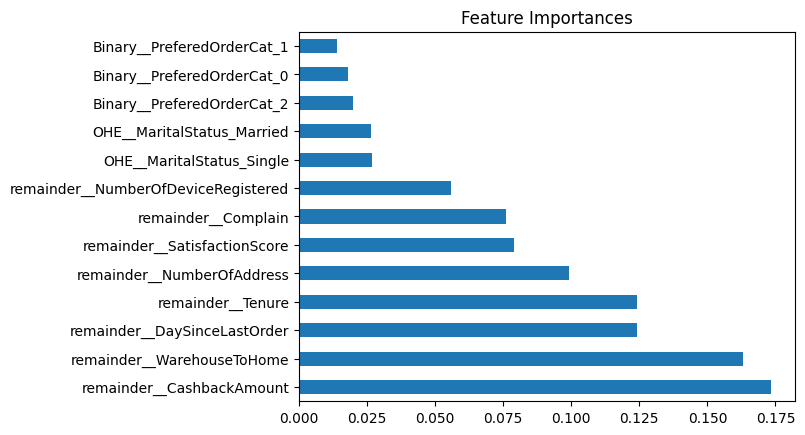

In [94]:
# Plot feature importance
feature_importance = pd.Series(best_model4['clf'].feature_importances_, transformer2.get_feature_names_out()).sort_values(ascending = False)
feature_importance.plot(kind='barh', title='Feature Importances')
plt.show()

Berdasarkan grafik, dapat disimpulkan bahwa dari 13 kolom yang disajikan, semuanya merupakan fitur yang mempengaruhi potensi pelanggan untuk *churn* dalam model *machine learning*. Dalam analisis ini, fitur yang paling berpengaruh terhadap prediksi *churn* adalah *cashback amount*, yang menempati peringkat paling atas dalam tingkat pentingnya fitur. Selanjutnya, *warehouse to home* (jarak antara gudang dan rumah pelanggan) dan *day since last order* (jumlah hari sejak pesanan terakhir) juga memiliki dampak yang signifikan dalam memprediksi perilaku *churn*. Hasil ini memberikan wawasan berharga kepada perusahaan untuk memfokuskan strategi retensi pelanggan mereka pada elemen-elemen ini. 

Dengan melakukan *feature selection* dan menggabungkan fitur-fitur yang berpengaruh, kita dapat membandingkan kinerja model yang lebih sederhana dengan model yang saat ini digunakan. Tujuannya adalah mencari model yang baik dalam memberikan prediksi yang akurat sekaligus mudah dipahami

## **Kesimpulan**
---

In [84]:
# Model Final

model_final = Pipeline([
    ('Preprocess',transformer2),
    ('imba',rus),
    ('clf',rf)
])

model_final.fit(xtrain, ytrain)
pred_model_final = model_final.predict(xtest)
f2_model_final = fbeta_score(ytest, pred_model_final, beta=2)

# Menampilkan classification report hasil prediksi menggunakan model final
print(classification_report(ytest,pred_model_final))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       546
           1       0.52      0.85      0.64       107

    accuracy                           0.85       653
   macro avg       0.74      0.85      0.77       653
weighted avg       0.89      0.85      0.86       653



Berdasarkan hasil diatas dapat disimpulkan bahwa dengan prediksi menggunakan model yang sudah dibuat, model dapat mengetahui 84% pelanggan yang tidak churn dan 85% pelanggan yang churn berdasarkan recall. Selain itu model memiliki kemampuan untuk mengidentifikasi 85% pelanggan yang sebenarnya *churn* (recall), namun hanya 52% dari pelanggan yang diprediksi *churn* oleh model yang benar-benar akan *churn* (precission).

#### **Simpan Model Final**

In [100]:
# Save Model 
import pickle

# Pipeline Model Final
model_final = Pipeline([
    ('Preprocess',transformer2),
    ('imba',rus),
    ('clf',rf)
])

model_final.fit(xtrain, ytrain)

pickle.dump(model_final, open('Final_Model_E-Commerce_Customer_Churn.sav', 'wb'))

In [101]:
# Load Model

nama_file = 'Final_Model_E-Commerce_Customer_Churn.sav'
load_model = pickle.load(open(nama_file, 'rb'))
load_model


Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['PreferedOrderCat'])])),
                ('imba', RandomUnderSampler()),
                ('clf', RandomForestClassifier(random_state=2023))])

#### **Penerapan Model Dalam Upaya Meningkatkan Efisiensi Biaya**

Text(50.722222222222214, 0.5, 'Actual')

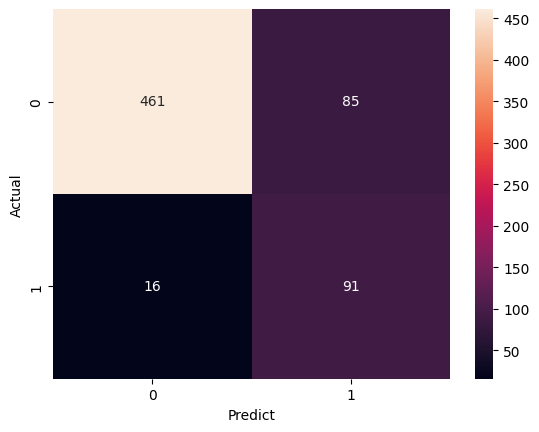

In [102]:
# Menampilkan confussion matrix model final

sns.heatmap(confusion_matrix(ytest,pred_model_final), annot=True, fmt='g')
plt.xlabel('Predict')
plt.ylabel('Actual')

Berdasarkan confussion matrix pada hasil prediksi model final, diperoleh hasil sebagai berikut:
- Jumlah pelanggan yang aktualnya *churn* dan diprediksi *churn* (**True Positive**) : 91 orang
- Jumlah pelanggan yang aktualnya *churn* tetapi diprediksi tidak *churn* (**False Negative**) : 16 orang
- Jumlah pelanggan yang aktualnya tidak *churn* tetapi diprediksi *churn* (**False Positive**) : 85 orang
- Jumlah pelanggan yang aktualnya tidak *churn* dan diprediksi tidak *churn* (**True Negative**) : 461 orang
---
Berdasarkan asumsi yang telah disampaikan pada bagian Business Understanding, kita asumsikan dampak biayanya sebagai berikut :
- Biaya retensi per pelanggan = $27,4
- Biaya akibat kehilangan pelanggan (CAC) = $274 ([referensi](https://userpilot.com/blog/average-customer-acquisition-cost/) )

#### **Estimasi biaya tanpa model machine learning**
Jumlah calon pelanggan untuk dasar perhitungan: <br>
- Calon pelanggan yang menyebabkan keluarnya CAC = 16 + 91 = 107 orang
107 orang x $274 per bulan per pelanggan = $29.318 per bulan

**Maka total biaya yang dikeluarkan bila tidak menggunakan model machine learning adalah $29.318 per bulan**

Jumlah calon pelanggan untuk dasar perhitungan: <br>
- Calon pelanggan yang akan diberikan program retensi = TP + FP = 176 orang
- Calon pelanggan yang menyebabkan keluarnya CAC = FN = 16 orang
(176 orang x $27,4 per bulan per pelanggan) + (16 orang x $274 per bulan per pelanggan) =$4882,4 + $4384 = $9266,4 per bulan

**Maka total biaya yang dikeluarkan bila menggunakan model machine learning adalah $9266,4 per bulan**

**Total penurunan pottential loss** = $29.318 - $9266,4 = $20.051,6 <br>
**Persentase penurunan** = $20.051,6/$29.318 x 100 = 68.39% 

**Berdasarkan data test, model final dapat membantu perusahaan menghindari kerugian hingga 68.69%.**


## **Rekomendasi**
---

**Rekomendasi Untuk Perusahaan**

- Customer yang melakukan churn dapat menimbulkan kerugian bagi perusahaan. Oleh karena itu, perusahaan e-commerce perlu menyusun strategi agar dapat tetap menjaga kualitas produk dan pelayanan, serta membuat UX yang user friendly, agar dapat menghindari complaint yang masuk.
- Perusahaan e-commerce perlu menyusun strategi agar dapat menciptakan loyalitas pelanggan, baik dengan melakukan inovasi pada produk yang dipasarkan dan memberikan penawaran yang menarik, sehingga tenure customer semakin tinggi.
- Perusahaan e-commerce perlu memahami Marketing Funnel. Marketing Funnel adalah sebuah konsep untuk menjelaskan tahapan yang dilalui oleh pelanggan sebelum akhirnya melakukan pembelian produk. Dengan mengetahui dan memahami Marketing Funnel, maka sebuah perusahaan akan lebih mudah untuk mengidentifikasi penyebab pelanggan membatalkan pembelian, sehingga dapat menyusun strategi untuk dapat mengatasinya.
- Perusahaan perlu menggunakan machine learning yang sudah dibuat, agar dapat mengurangi kerugian bagi perusahaan dengan memberikan promosi tepat sasaran kepada customer yang akan melakukan churn.

**Rekomendasi Untuk Model**
- Menambah kolom yang relevan untuk meningkatkan kebaikan model yang diperlukan untuk analisis *churn*.
- Pada model yang tidak dilakukan resampling cenderung *overfitting*. Pertimbangkan penggunaan metode regularisasi seperti L1 dan L2 regularization pada model akan membantu menghindari kompleksitas yang berlebihan.
- Pertimbangkan untuk melakukan ekstraksi fitur tambahan atau penggabungan fitur untuk meningkatkan performa model.
- Selain dari analisis yang telah dilakukan, lakukan analisis yang lebih mendalam terhadap variabel-variabel utama yang memengaruhi churn. Ini akan membantu Anda memahami lebih baik faktor-faktor yang mempengaruhi pelanggan untuk *churn*.
- Menggunakan parameter-parameter yang lebih kompleks dalam hyperparameter tuning agar performa model meningkat.

